In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [19]:
data = pd.read_csv('first_exo/concrete_strength_dataset.csv')
raw_df = data.copy()
raw_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
features = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']
target = ['Strength']

In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [28]:
print('Number of missing values for each feature:',raw_df.isnull().sum())
print('Number of duplicated values:',raw_df.duplicated().sum())

Number of missing values for each feature: Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64
Number of duplicated values: 25


In [25]:
corr_matrix = raw_df[raw_df.columns[0:]].corr()['Strength'][:-1]
corr_matrix = corr_matrix.to_frame()

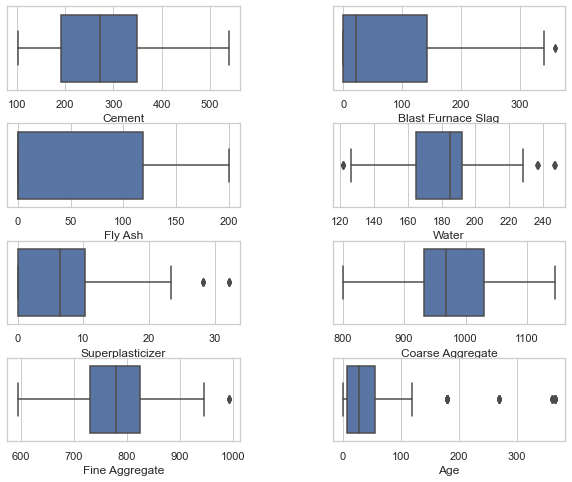

In [30]:
plt.figure(figsize =(10,8))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = raw_df[i])
plt.show()

In [31]:
# Remove outliers

In [35]:
raw_df = raw_df[(np.abs(stats.zscore(raw_df)) < 3).all(axis=1)]

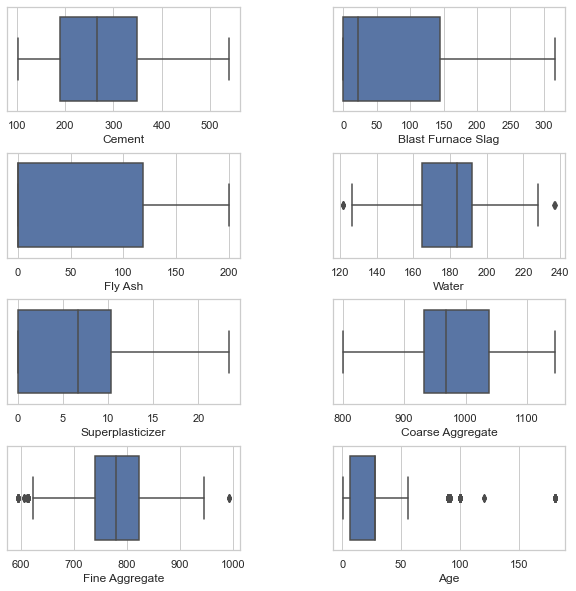

In [36]:
plt.figure(figsize =(10,10))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = raw_df[i])
plt.show()

In [ ]:
# Feature distribution

In [ ]:
# plt.figure(figsize =(10,10))
# n = 0
# sns.set(style="whitegrid")
# for i in features:
#     n += 1
#     plt.subplot(4,2,n)
#     plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
#     sns.displot(data=raw_df, x=raw_df[i])
# plt.show()

# n=0
# for feature in features:
#     n += 1
#     plt.subplot(4,4,n)
#     sns.displot(data=raw_df, x=feature, kind='kde')
# plt.show()

# plt.figure()
# plt.subplot(2,2,1)
# sns.displot(data=raw_df, x='Cement', kind='kde')
# plt.subplot(2,2,2)
# sns.displot(data=raw_df, x='Water', kind='kde')
# plt.show()

# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(6, 3,i[0]+1)
    sns.displot(x = i[1], data = raw_df)
    plt.xticks(rotation = 45)

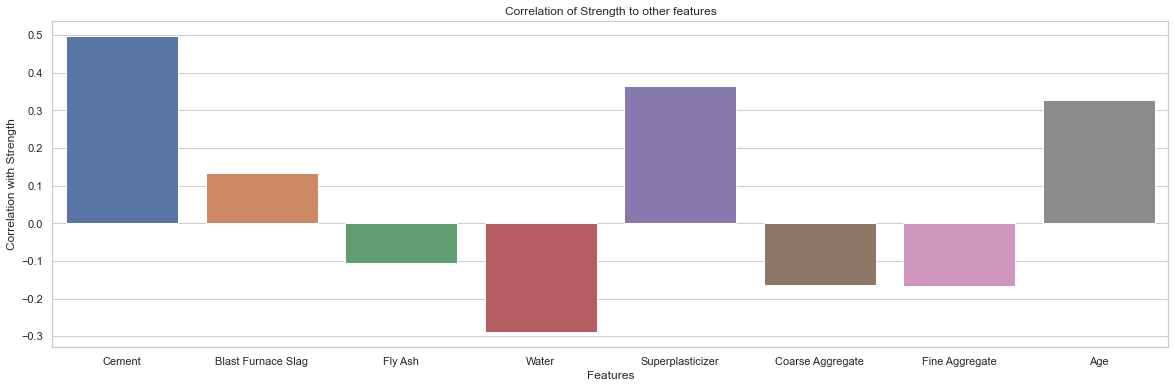

,Strength
Cement,0.497832
Blast Furnace Slag,0.134829
Fly Ash,-0.105755
Water,-0.289633
Superplasticizer,0.366079
Coarse Aggregate,-0.164935
Fine Aggregate,-0.167241
Age,0.328873


In [37]:
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = corr_matrix.index,y = corr_matrix['Strength'],data = corr_matrix)
plt.title('Correlation of Strength to other features')
plt.ylabel('Correlation with Strength')
plt.xlabel('Features')
plt.show()
corr_matrix

<Figure size 576x576 with 0 Axes>

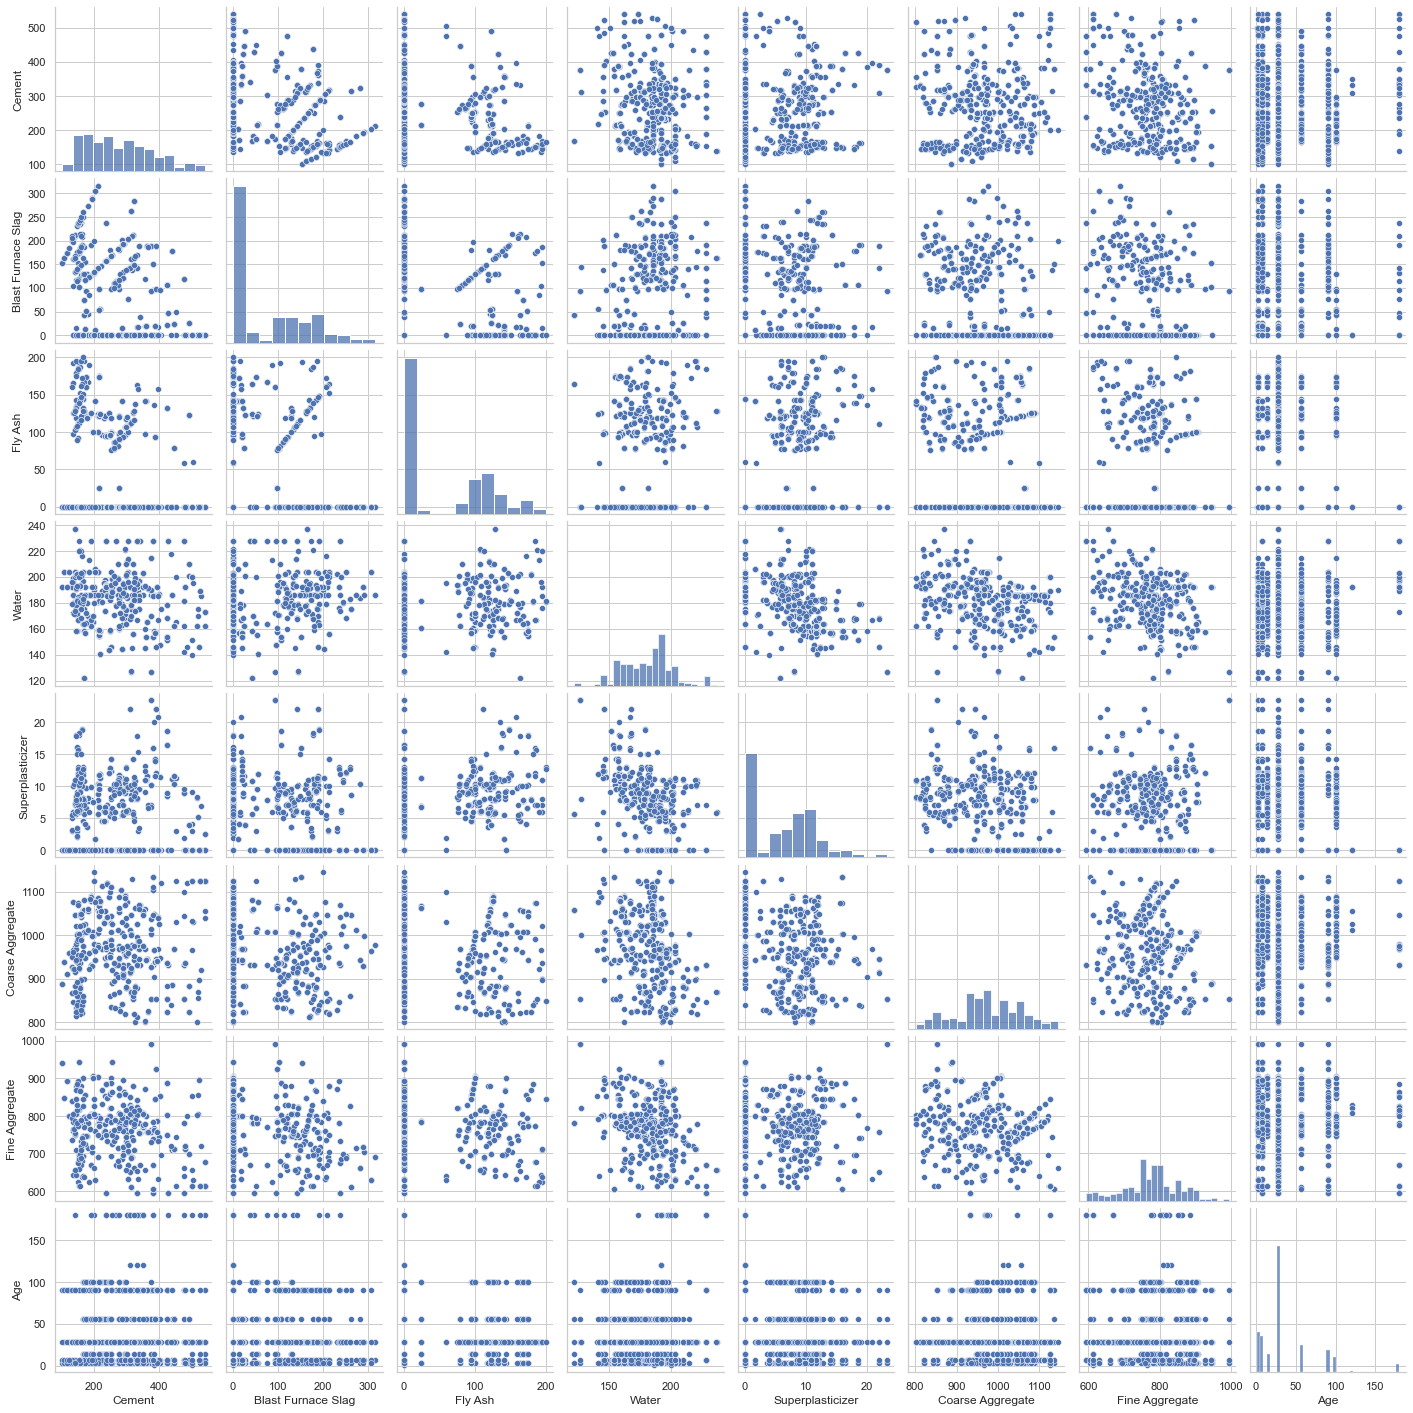

In [38]:
plt.figure(figsize=(8,8))
sns.pairplot(raw_df[features],palette='coolwarm')
plt.show()

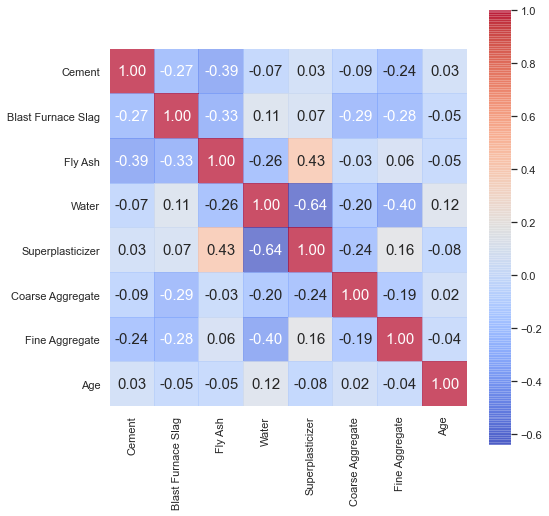

In [40]:
corr = raw_df[features].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()